In [2]:
import skimage as sk
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from copy import copy
from scipy.optimize import minimize

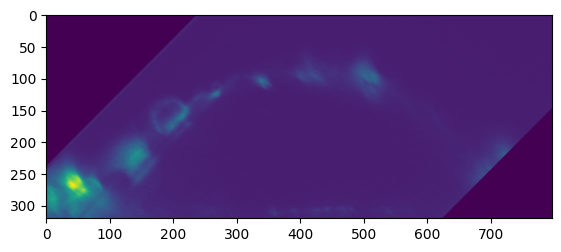

In [26]:
image = sk.io.imread('./../test_domes/Dome103_processed_n2v2d.tif')
image = np.transpose(image, axes=(1, 0, 2))

plt.figure(figsize=(30,7))

plt.subplot(1,4,1)
plt.imshow(image[300])

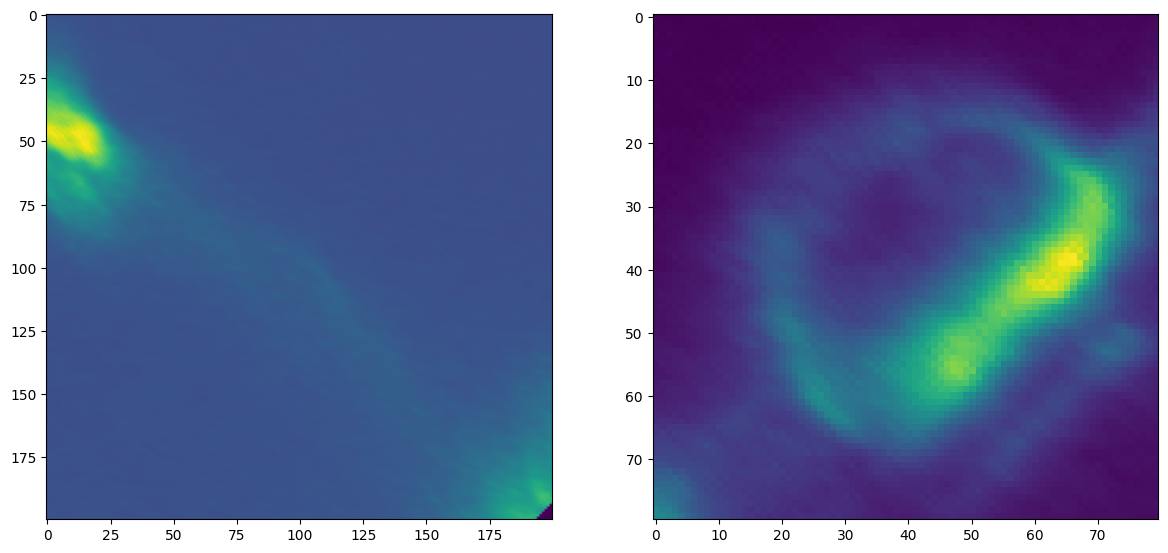

In [4]:
plt.figure(figsize=(30,7))

plt.subplot(1,4,1)
# image_g = gaussian_filter(image[300], sigma=2)
plt.imshow(image[300, 50:250, 500:700])


good_border = image[300, 120:200, 150:230]

plt.subplot(1,4,2)
plt.imshow(good_border)

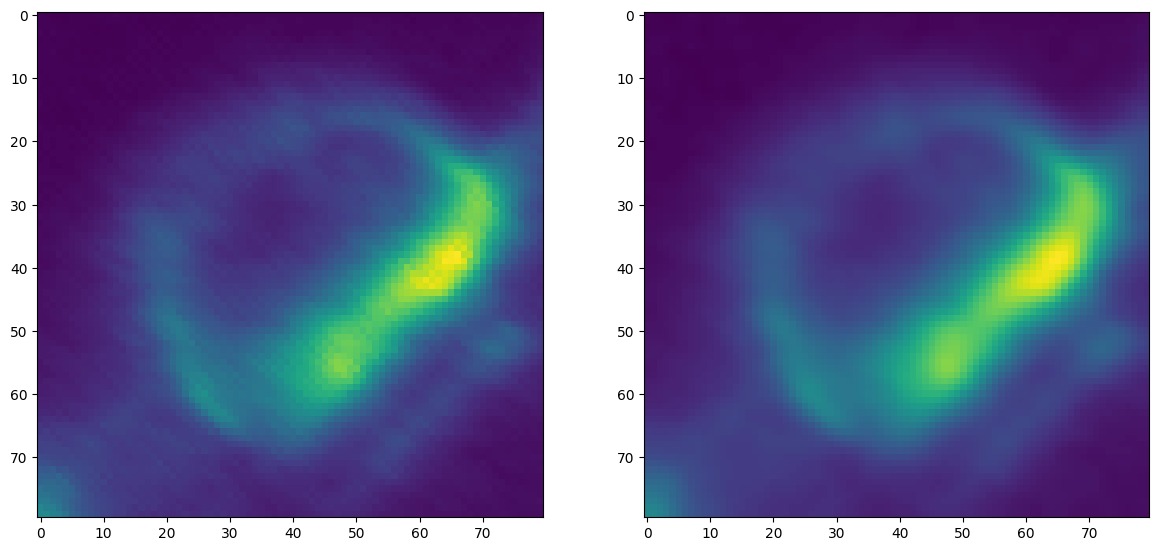

In [42]:
def antienhance_border(image):
    mean = np.mean(image)
    bad_image = copy(image)

    #bad_image[bad_image > mean] *=0.9
    
    bad_image = bad_image + np.random.randn(*image.shape)
    bad_image = cv.GaussianBlur(bad_image, (5, 5), 0)
    
    
    #bad_image[bad_image < mean] = mean
    
    return bad_image

plt.figure(figsize=(30,7))
plt.subplot(1,4,1)
plt.imshow(good_border)

bad_border = antienhance_border(good_border)
plt.subplot(1,4,2)
plt.imshow(bad_border)